### Градиентный спуск (дополнительный материал)

Вспомним нормальное уравнение:

$$\overrightarrow{w}_{opt} = \left(X^TX\right)^{-1}X^T\overrightarrow{y}.$$

Здесь присутствует обращение матрицы $X^TX$ — довольно трудоёмкая операция при большом количестве признаков: сложность вычислений $O(d^3)$. При решении реальных задач такая трудоёмкость часто оказывается непозволительной, поэтому параметры ищут итерационными методами, стоимость которых меньше. Один из них — *градиентный спуск* (gradient descent).

Напомним, что в градиентном спуске значения параметров на следующем шаге получаются из значений параметров на текущем шаге смещением в сторону антиградиента функционала: 

$$\overrightarrow{w}^{(k+1)} = \overrightarrow{w}^{(k)} - \eta_k \nabla Q(\overrightarrow{w}^{(k)}),$$
где $\eta_k$ — шаг градиентного спуска.

Формула градиента функции ошибки выглядит следующим образом:

$$\nabla Q(\overrightarrow{w}) = \nabla_\overrightarrow{w}\left(\frac{1}{l}\|X\overrightarrow{w}-\overrightarrow{y}\|^2\right) = \frac{2}{l}X^T(X\overrightarrow{w} - \overrightarrow{y}).$$
 
Сложность вычислений в данном случае $O(dl)$.  

Стохастический градиентный спуск отличается от обычного заменой градиента на несмещённую оценку по одному или нескольким объектам. В этом случае сложность становится $O(kd)$, где $k$ — количество объектов, по которым оценивается градиент, $k << l$. Это отчасти объясняет популярность стохастических методов оптимизации.

In [112]:
%pylab inline
np.random.seed(16)

Создадим данные для эксперимента следующим образом: сгенерируем вектор параметров $\overrightarrow{w}_{true}$ и матрицу объекты признаки $X$. Вектор из целевых переменных $Y$ будет вычисляться как зашумлённая версия $X\overrightarrow{w}_{true}$:

X: [[  0.50701457 -13.6319415 ]
 [ -1.39271165  -8.30757175]
 [  1.88726162 -10.08805725]
 [ -4.29675133  13.23032581]
 [  0.6368138  -12.66022982]
 [  2.22640511 -10.24643479]
 [ -2.49718693  -6.19538232]
 [  1.96610714  -1.07207736]
 [ -2.84937856  -1.59521214]
 [ -3.79121248  12.53061023]
 [  0.66446329  -0.83942053]
 [ -1.85433575 -13.70352811]
 [  2.52444917   1.29807132]
 [  2.67190426   8.71346299]
 [ -4.27778621   4.79147503]
 [ -4.46700662   5.55073358]
 [ -0.56649038  -0.96011558]
 [  1.61059335   5.69899896]
 [ -2.36670516 -14.65563199]
 [  2.71294447   9.48426979]
 [ -3.60358396   2.34020237]
 [ -1.59325728  -8.03353538]
 [ -3.01356246  -6.8552768 ]
 [  4.76852764  -8.53713065]
 [ -1.43592583 -14.4480016 ]
 [  1.1679027   -8.08783837]
 [  2.42351736   2.52750625]
 [ -0.79896445   6.27758497]
 [  4.72045526   9.30117353]
 [ -0.6934482   13.73185799]
 [ -4.52241899   6.98345403]
 [  1.75666449   0.81015503]
 [  0.66987452   6.68835748]
 [  1.8260335    8.8593804 ]
 [ -3.87154

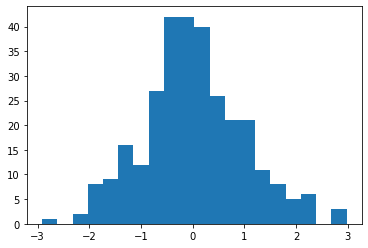

normal_dist: [ 1.93321584e-03 -8.41850934e-01  1.04979606e+00 -2.79571724e-01
 -1.21625395e+00  3.15374070e-01 -1.47914283e+00  1.07647018e-01
  5.31805976e-03 -1.29727927e-01  4.55559432e-01 -7.83999469e-01
 -7.65579610e-01 -7.20198369e-01 -3.37631391e-02 -1.78142719e+00
 -4.80351444e-01  1.04858085e+00  1.36837252e+00 -1.50754488e-01
  9.18312606e-01 -9.87597457e-02 -2.28929938e-01  1.99927010e-01
 -1.36879267e-01 -1.48975771e+00 -4.96758811e-01 -5.51250603e-01
 -2.32078860e-01 -5.08291749e-01  2.51412078e-01 -4.64967690e-01
  1.43277301e-01 -6.99210332e-01 -6.59561156e-01 -7.91006714e-01
 -1.32092429e+00 -9.34972433e-01  5.23708970e-01  5.06629074e-01
 -7.81958672e-01  1.00766491e+00  4.26606332e-02 -1.48260315e-01
 -1.31493734e+00 -1.25383233e+00 -8.48295563e-01  3.50925336e-01
 -7.20800360e-01  1.79146460e-01 -4.38488791e-01  4.90847718e-01
  9.79670580e-01 -2.13771247e-01 -1.37218587e+00 -1.73456779e-01
 -6.30249395e-01  3.02664120e-01  8.75676361e-02 -1.31133133e+00
 -4.25523532

In [113]:
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  # for different scales
Y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_0 = np.random.uniform(-2, 2, (n_features))

Обучим линейную регрессию (в случае среднеквадратичной ошибки) для этих данных при помощи GD — тем самым получим значения параметров.

In [114]:
w = w_0.copy()
w_list = [w.copy()]
step_size = 1e-2

for i in range(num_steps):
    w -= 2 * step_size * np.dot(X.T, np.dot(X, w) - Y) / Y.shape[0]
    w_list.append(w.copy())
w_list = np.array(w_list)

1e-05
w_true: [ 0.12794872 -1.52847346]
w_list:


array([[ 0.64242799, -1.20634325],
       [ 0.55383526, -1.71679325],
       [ 0.48576286, -1.43558426],
       [ 0.42620852, -1.58924528],
       [ 0.37840882, -1.50423879],
       [ 0.33780097, -1.55039585],
       [ 0.30457715, -1.52461684],
       [ 0.27671064, -1.53841279],
       [ 0.25371885, -1.53053835],
       [ 0.23454175, -1.5346142 ],
       [ 0.21866099, -1.53216998],
       [ 0.20544732, -1.53334099],
       [ 0.19448732, -1.53255582],
       [ 0.18537771, -1.53286893],
       [ 0.17781647, -1.53259896],
       [ 0.17153472, -1.53266579],
       [ 0.16631909, -1.53256147],
       [ 0.16198692, -1.5325626 ],
       [ 0.1583895 , -1.53251535],
       [ 0.1554017 , -1.53250257],
       [ 0.1529205 , -1.53247742],
       [ 0.15085985, -1.53246452],
       [ 0.14914855, -1.53244942],
       [ 0.14772732, -1.53243929],
       [ 0.14654703, -1.53242955],
       [ 0.14556681, -1.53242219],
       [ 0.14475276, -1.53241568],
       [ 0.14407671, -1.53241049],
       [ 0.14351526,

Покажем последовательность оценок параметров $\overrightarrow{w}$, получаемых в ходе итераций. Красная точка — $\overrightarrow{w}_{true}$.

A.shape: (100, 100)
B.shape: (100, 100)


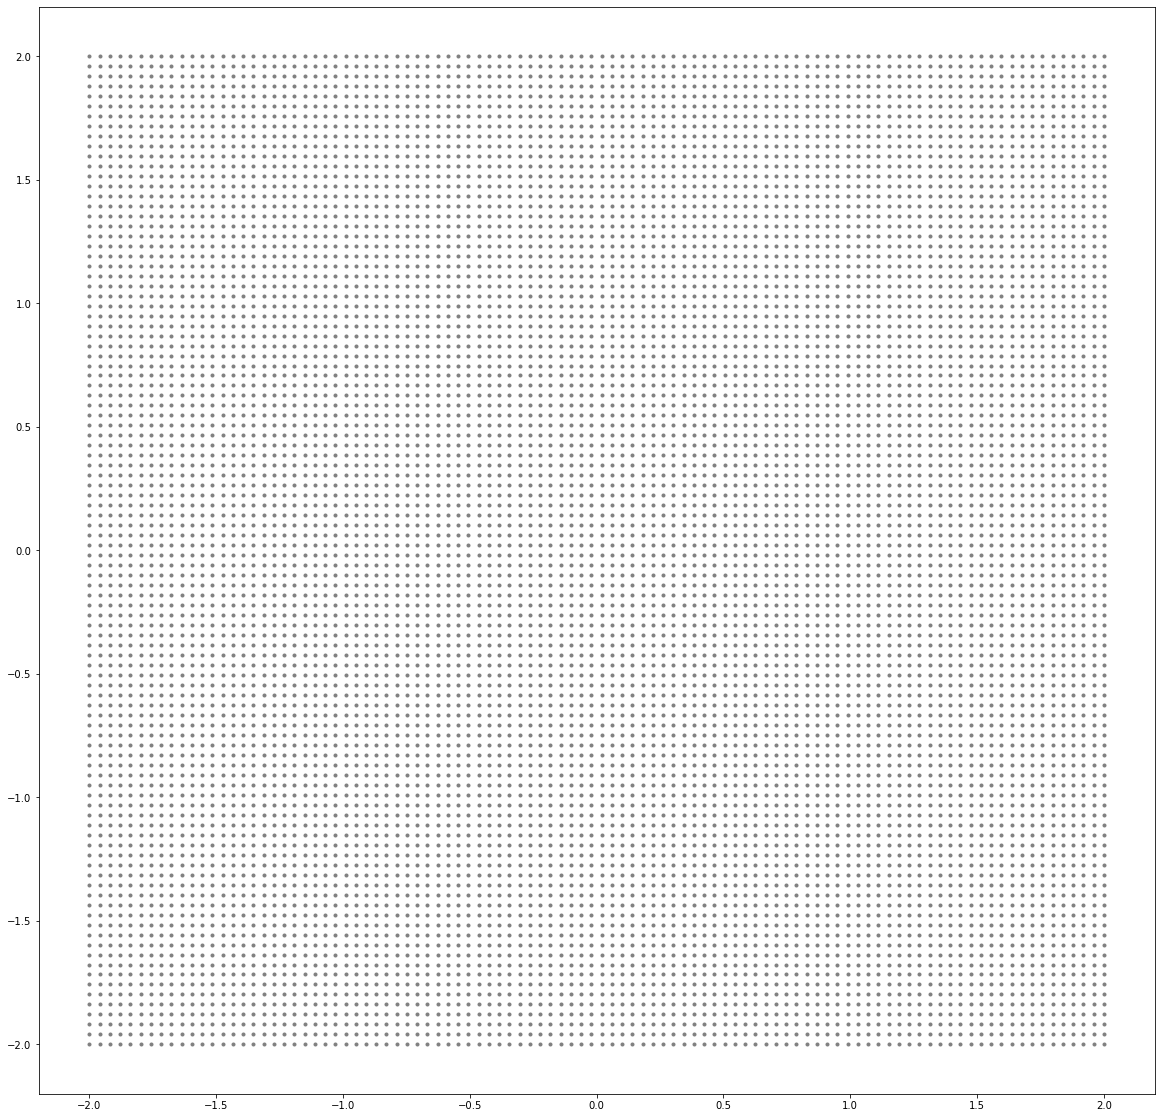

C:\Users\bred7\AppData\Local\Temp\ipykernel_13336\377427418.py:26: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


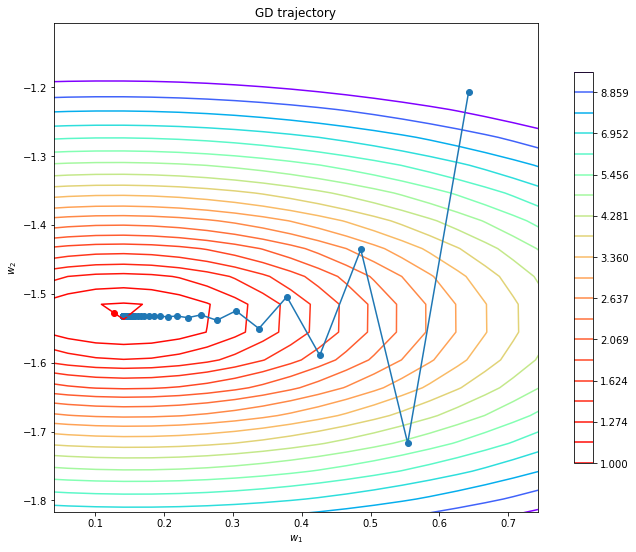

In [115]:
# compute level set
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))


plt.figure(figsize=(13, 9))
plt.title('GD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1))
plt.ylim((w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1))
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

В курсе анализа получен результат о том, что градиент перпендикулярен линиям уровня. Это объясняет такие зигзагообразные траектории градиентного спуска. Для большей наглядности в каждой точке пространства посчитаем градиент функционала и покажем его направление.

C:\Users\bred7\AppData\Local\Temp\ipykernel_13336\1626388614.py:14: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


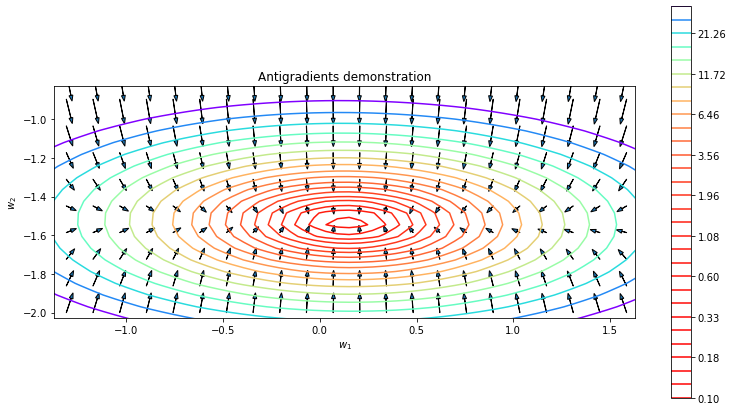

In [116]:
# compute level set
A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
A_mini, B_mini = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 27))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))
        
# visualize the level set
plt.figure(figsize=(13, 9))
CS = plt.contour(A, B, levels, levels=np.logspace(-1, 1.5, num=30), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
        
# visualize the gradients
gradients = np.empty_like(A_mini)
for i in range(A_mini.shape[0]):
    for j in range(A_mini.shape[1]):
        w_tmp = np.array([A_mini[i, j], B_mini[i, j]])
        antigrad = - 2*1e-3 * np.dot(X.T, np.dot(X, w_tmp) - Y) / Y.shape[0]
        plt.arrow(A_mini[i, j], B_mini[i, j], antigrad[0], antigrad[1], head_width=0.02)

plt.title('Antigradients demonstration')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_true[0] - 1.5, w_true[0] + 1.5))
plt.ylim((w_true[1] - .5, w_true[1] + .7))
plt.gca().set_aspect('equal')
plt.show()